In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Assuming the dataset is in a CSV file named 'bank_data.csv'
df = pd.read_csv('C:/Users/1234/Downloads/bank-full.csv')

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45211 non-null  int64 
 1   Job             45211 non-null  object
 2   Marital Status  45211 non-null  object
 3   Education       45211 non-null  object
 4   Default         45211 non-null  object
 5   Balance         45211 non-null  int64 
 6   Housing         45211 non-null  object
 7   Loan            45211 non-null  object
 8   Contact         45211 non-null  object
 9   Day             45211 non-null  int64 
 10  Month           45211 non-null  object
 11  Duration        45211 non-null  int64 
 12  Campaign        45211 non-null  int64 
 13  Pdays           45211 non-null  int64 
 14  Previous        45211 non-null  int64 
 15  Poutcome        45211 non-null  object
 16  y               45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

In [4]:
# Display summary statistics for numeric columns
print(df.describe())

                Age        Balance           Day      Duration      Campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              Pdays      Previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [5]:
# Explore the first few rows of the dataset
print(df.head())

   Age           Job Marital Status  Education Default  Balance Housing Loan  \
0   58    management        married   tertiary      no     2143     yes   no   
1   44    technician         single  secondary      no       29     yes   no   
2   33  entrepreneur        married  secondary      no        2     yes  yes   
3   47    bluecollar        married    unknown      no     1506     yes   no   
4   33       unknown         single    unknown      no        1      no   no   

   Contact  Day Month  Duration  Campaign  Pdays  Previous Poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [6]:
# Check for missing values
print(df.isnull().sum())

Age               0
Job               0
Marital Status    0
Education         0
Default           0
Balance           0
Housing           0
Loan              0
Contact           0
Day               0
Month             0
Duration          0
Campaign          0
Pdays             0
Previous          0
Poutcome          0
y                 0
dtype: int64


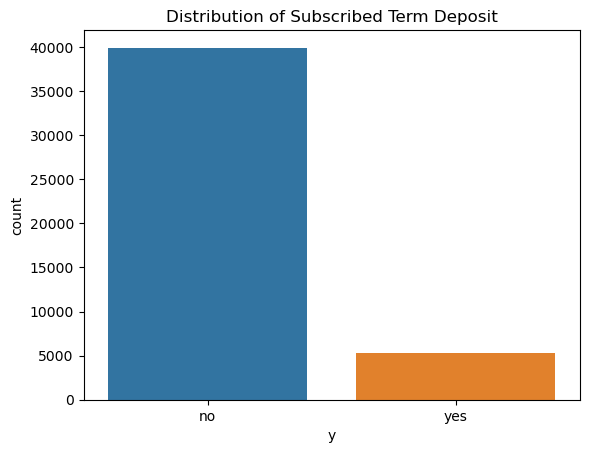

In [7]:
# Visualize the distribution of the target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of Subscribed Term Deposit')
plt.show()

In [14]:
## It appears that there is an imbalance in the classes, meaning one class may be significantly more prevalent than the other.
## The count of "no" (clients who did not subscribe to a term deposit) seems to be higher than the count of "yes" (clients who subscribed to a term deposit).

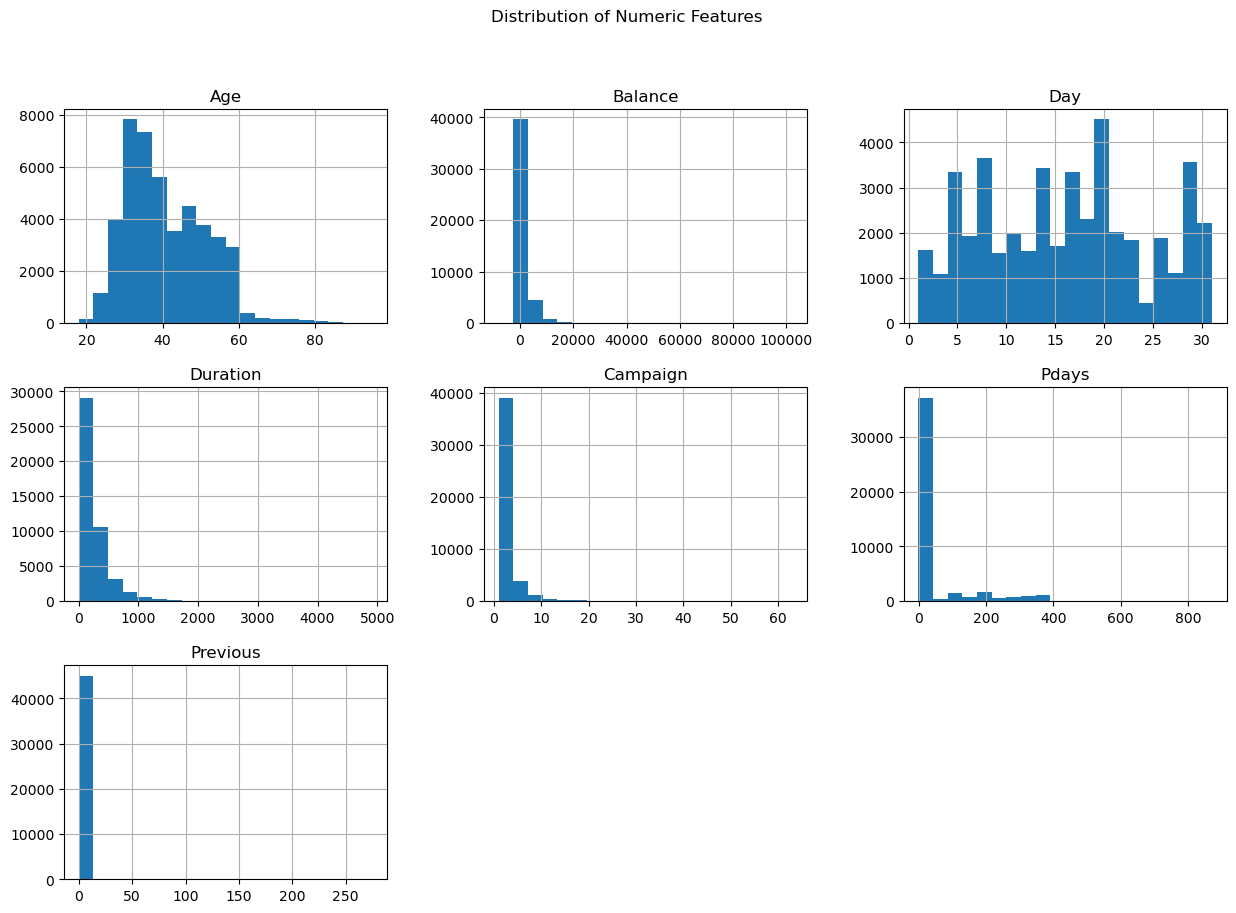

In [10]:
# Explore the distribution of numeric features
numeric_features = ['Age', 'Balance', 'Day', 'Duration', 'Campaign', 'Pdays', 'Previous']
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

In [ ]:
#1.Age Distribution: The "Age" histogram shows the distribution of ages in dataset. It seems more middle aged people are present in the dataset.
#2.Balance Distribution: The "Balance" histogram illustrates the distribution of average yearly balances.It seems like very less balances are noticed in the dataset.
#3.Day Distribution: The "Day" histogram represents the last contact day of the month. The distribution is roughly uniform, indicating a relatively even spread of contacts throughout the month.
#4.Duration Distribution: The "Duration" histogram shows the distribution of the last contact duration in seconds. You might observe a right-skewed distribution, as shorter durations may be more common than longer ones.
#5.Campaign Distribution: The "Campaign" histogram represents the number of contacts performed during the campaign.It seems very less times people were contacted for campaign.
#6.Pdays Distribution: The "Pdays" histogram displays the number of days since the client was last contacted from a previous campaign. A large number of -1 values may indicate clients who were not previously contacted.
#7.Previous Distribution: The "Previous" histogram represents the number of contacts performed before the current campaign.It seems that almost no one was contacted before

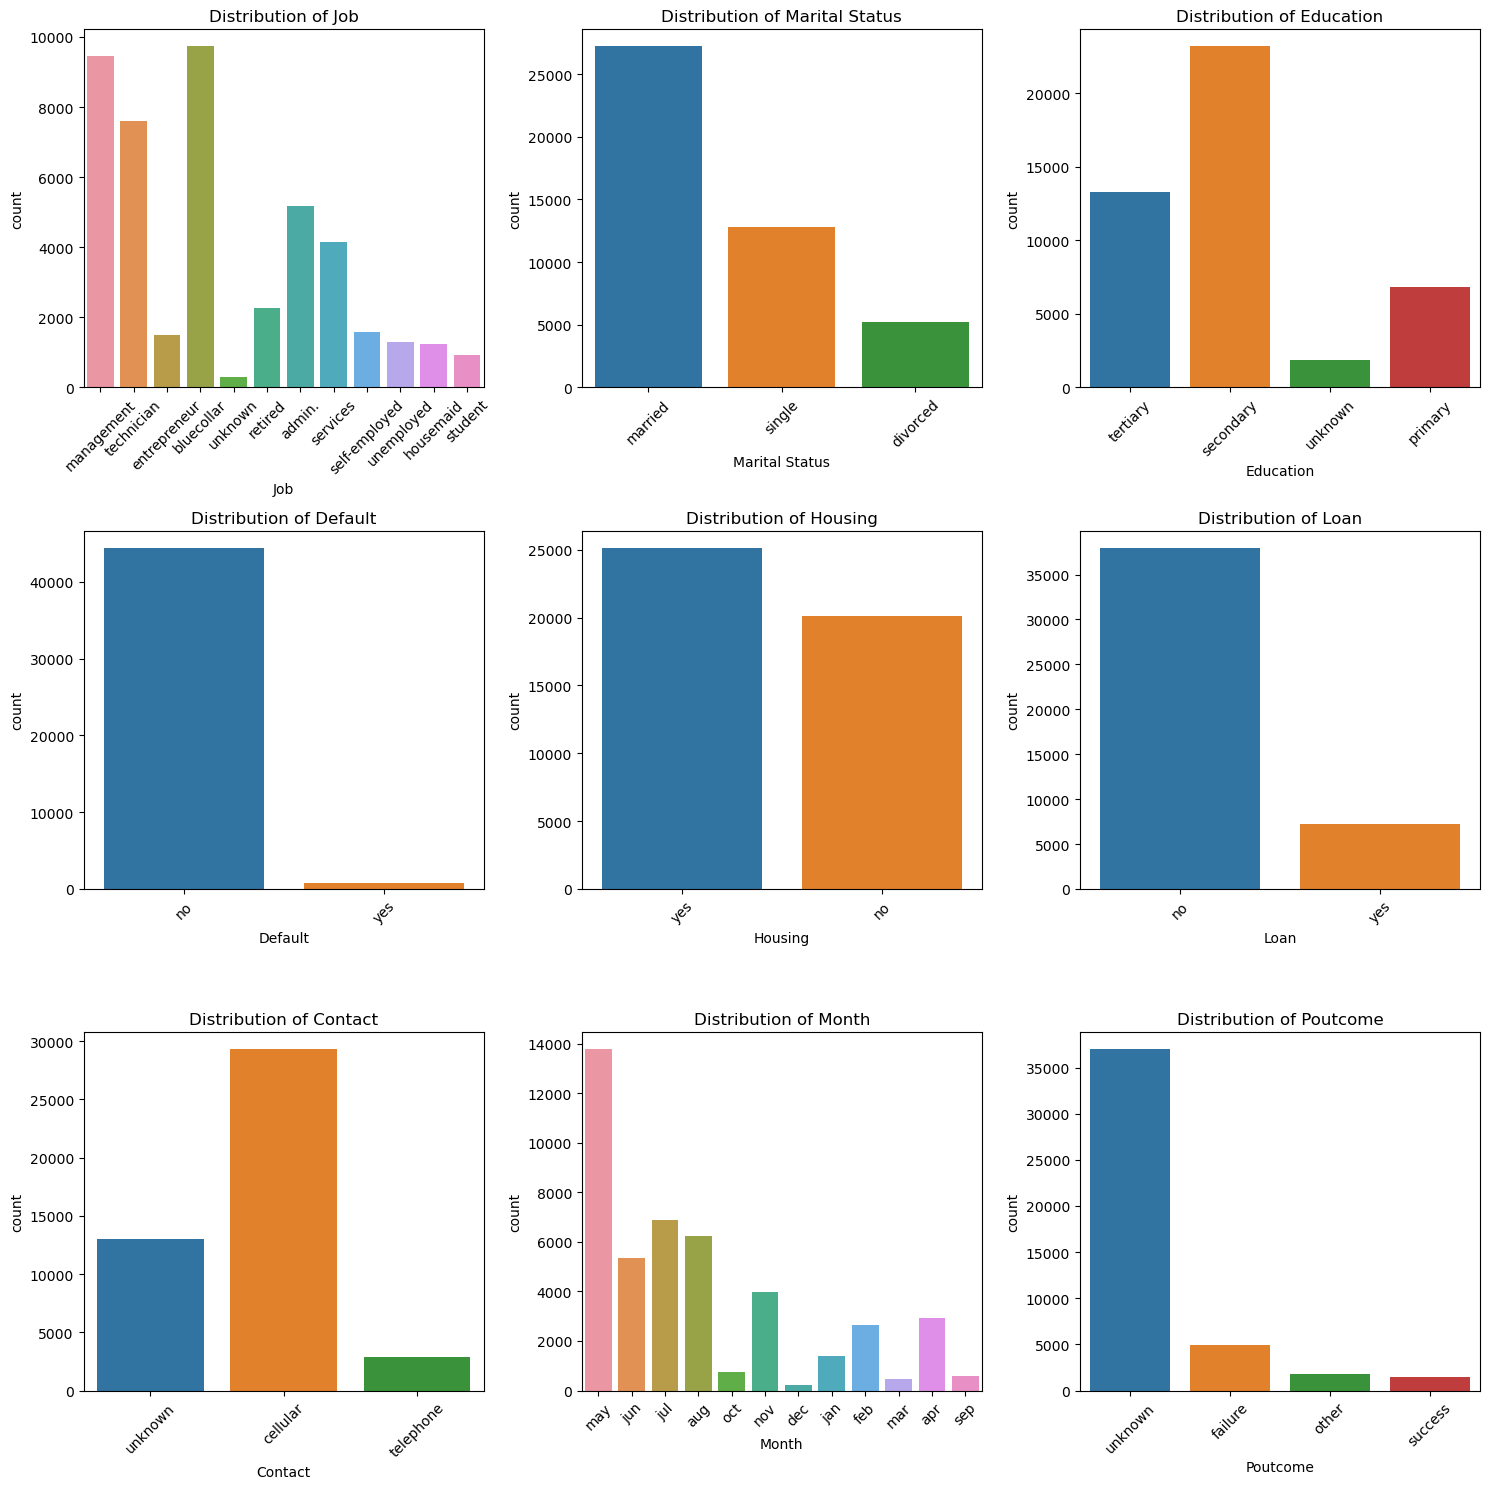

In [11]:
# Explore the distribution of categorical features
categorical_features = ['Job', 'Marital Status', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'Poutcome']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# In all the above graphs, you can observe the distribution of values for each categorical variable in the dataset.

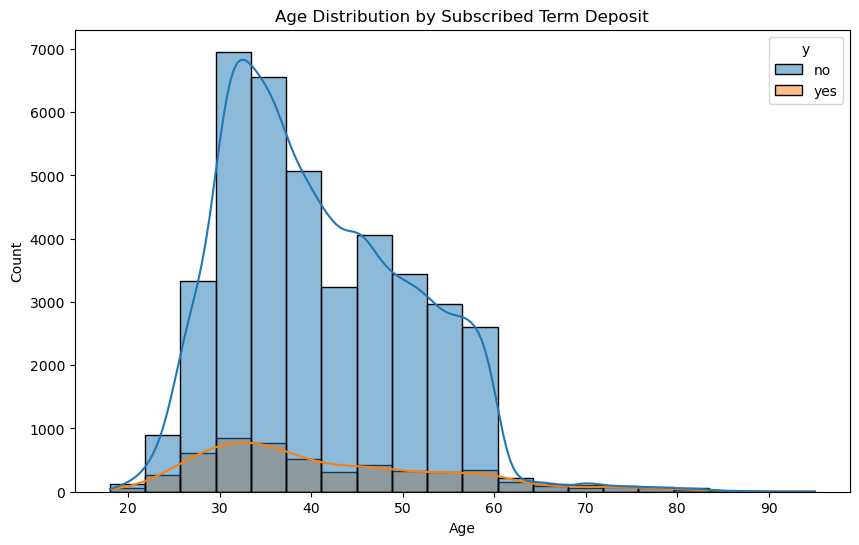

In [12]:
# Explore the relationship between features and the target variable
# For example, let's visualize the age distribution for each target class
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, hue='y', bins=20, kde=True)
plt.title('Age Distribution by Subscribed Term Deposit')
plt.show()

In [16]:
# The histogram shows the distribution of ages for clients who either subscribed or did not subscribe to a term deposit.
# The two distributions (for "yes" and "no" classes) show clear differences, it suggests that age is a relevant factor in determining whether a client subscribes to a term deposit.
# It seems that more middle aged persons only have subscribed for term deposit and same age group persons only have not subscribed for term deposit.

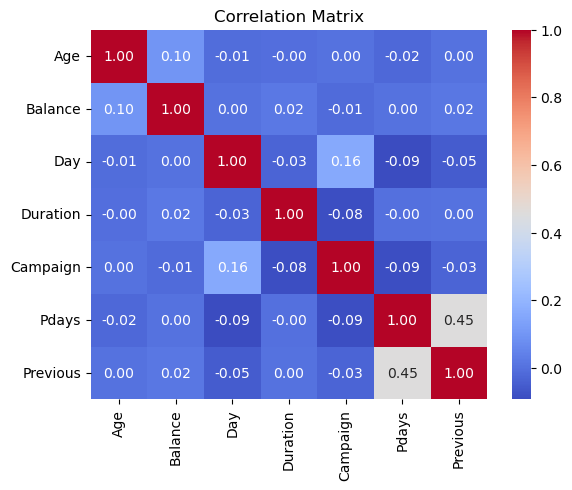

In [13]:
# Explore correlation between numeric features
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#The correlation matrix and heatmap provide insights into the linear relationships between numeric features. Here are some common inferences you can gather from the visualization:
#Positive Correlation: Features with a correlation coefficient close to 1 indicate a strong positive linear relationship.
#For example, if you observe a strong positive correlation between 'balance' and 'previous', it suggests that clients with higher average yearly balance tend to have had more previous contacts.
#Negative Correlation: Features with a correlation coefficient close to -1 indicate a strong negative linear relationship.
#For example, if 'campaign' and 'previous' have a strong negative correlation, it suggests that clients who were contacted more during the current campaign tend to have had fewer previous contacts.
#No Correlation (Close to 0): A correlation coefficient close to 0 suggests a weak or no linear relationship between the features.
#For instance, if 'age' and 'duration' have a correlation close to 0, it suggests that clients and theier age group does not have any relation.